In [ ]:
pip install pyalex

In [ ]:
#Montar mi google drive para poder usar los archivos
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd '/content/gdrive/My Drive/Ciencias/Data/OpenAlex/Estudios Demográficos y Urbanos'
!ls

/content/gdrive/My Drive/Ciencias/Data/OpenAlex/Estudios Demográficos y Urbanos
 citantes_estudios_demograficos.parquet  'Estudios Demograficos y Urbanos.gdoc'
 EstudiosDemograficos.ipynb		  performace_profile.csv
 estudios_demograficos_openalex.parquet


# Datos de la revista

In [ ]:
import pyalex
from pyalex import Works, Authors, Sources, Institutions, Topics, Publishers, Funders
pyalex.config.email = "jlja@ciencias.unam.mx"

In [ ]:

source = Sources()['s2737081250']
source

{'id': 'https://openalex.org/S2737081250',
 'issn_l': '0186-7210',
 'issn': ['0186-7210', '2448-6515'],
 'display_name': 'Estudios Demográficos y Urbanos',
 'host_organization': 'https://openalex.org/P4310319605',
 'host_organization_name': 'El Colegio de México',
 'host_organization_lineage': ['https://openalex.org/P4310319605'],
 'works_count': 1936,
 'cited_by_count': 5290,
 'summary_stats': {'2yr_mean_citedness': 0.5689655172413793,
  'h_index': 25,
  'i10_index': 147},
 'is_oa': True,
 'is_in_doaj': True,
 'is_indexed_in_scopus': True,
 'is_core': False,
 'ids': {'openalex': 'https://openalex.org/S2737081250',
  'issn_l': '0186-7210',
  'issn': ['0186-7210', '2448-6515'],
  'mag': '2737081250',
  'wikidata': 'https://www.wikidata.org/entity/Q15752766'},
 'homepage_url': 'http://estudiosdemograficosyurbanos.colmex.mx/index.php/edu',
 'apc_prices': [{'price': 0, 'currency': 'USD'}],
 'apc_usd': 0,
 'country_code': 'MX',
 'societies': [],
 'alternate_titles': [],
 'abbreviated_title'

In [ ]:
print(source['display_name'])  # Nombre de la revista
print(source['works_count'])   # Número de publicaciones

Estudios Demográficos y Urbanos
1936


In [ ]:

topics = source.get('topics', [])
df = pd.DataFrame(columns=['domain', 'field', 'subfield', 'topic', 'count'])
for topic in topics:
  df.loc[len(df)] = [topic['domain']['display_name'], topic['field']['display_name'], topic['subfield']['display_name'], topic['display_name'],  topic['count']]

In [ ]:
df

,domain,field,subfield,topic,count
0,Social Sciences,Social Sciences,Development,Regional Development and Innovation,447
1,Physical Sciences,Environmental Science,"Management, Monitoring, Policy and Law",Mexican Socioeconomic and Environmental Dynamics,300
2,Social Sciences,Social Sciences,Urban Studies,Latin American Urban Studies,294
3,Health Sciences,Medicine,"Public Health, Environmental and Occupational ...","Aging, Health, and Disability",154
4,Life Sciences,Agricultural and Biological Sciences,General Agricultural and Biological Sciences,Latin American rural development,106
5,Life Sciences,Agricultural and Biological Sciences,Food Science,Agricultural and Food Production Studies,98
6,Social Sciences,"Economics, Econometrics and Finance",Economics and Econometrics,Regional Economic and Spatial Analysis,98
7,Social Sciences,Social Sciences,Political Science and International Relations,Public Policy and Governance,88
8,Social Sciences,Social Sciences,Sociology and Political Science,Economic and Social Development,84
9,Social Sciences,Social Sciences,Gender Studies,"Gender, Labor, and Family Dynamics",78


In [ ]:
import plotly.express as px

fig = px.sunburst(
    df,
    path=['domain', 'field', 'subfield', 'topic'],
    values='count',
    #title='Jerarquía de tópicos de la revista (OpenAlex)',
)

# Cambiar tamaño del gráfico (ancho y alto en píxeles)
fig.update_layout(
    width=1200,   # ancho en píxeles
    height=1000,  # alto en píxeles
    #margin=dict(t=50, l=10, r=10, b=10)  # márgenes opcionales
)

fig.show()

In [ ]:

# Convertimos los tópicos a un DataFrame
df_topics = pd.DataFrame(topics)
df_topics = df_topics.sort_values(by='count', ascending=False)

fig = px.bar(
    df_topics,
    x='count',
    y='display_name',
    orientation='h',
    title='Tópicos de la revista según OpenAlex',
    labels={'display_name': 'Tópico', 'count': 'Relevancia (count)'}
)

# Opcional: ajustar el tamaño del gráfico
fig.update_layout(
    height=600,
    width=800,
    yaxis=dict(autorange="reversed")  # para que el más alto aparezca arriba
)

fig.show()


In [ ]:
counts_by_year = source.get('counts_by_year', [])
df_years = pd.DataFrame(counts_by_year)
df_years = df_years.sort_values(by='year')  # Asegura que estén en orden cronológico

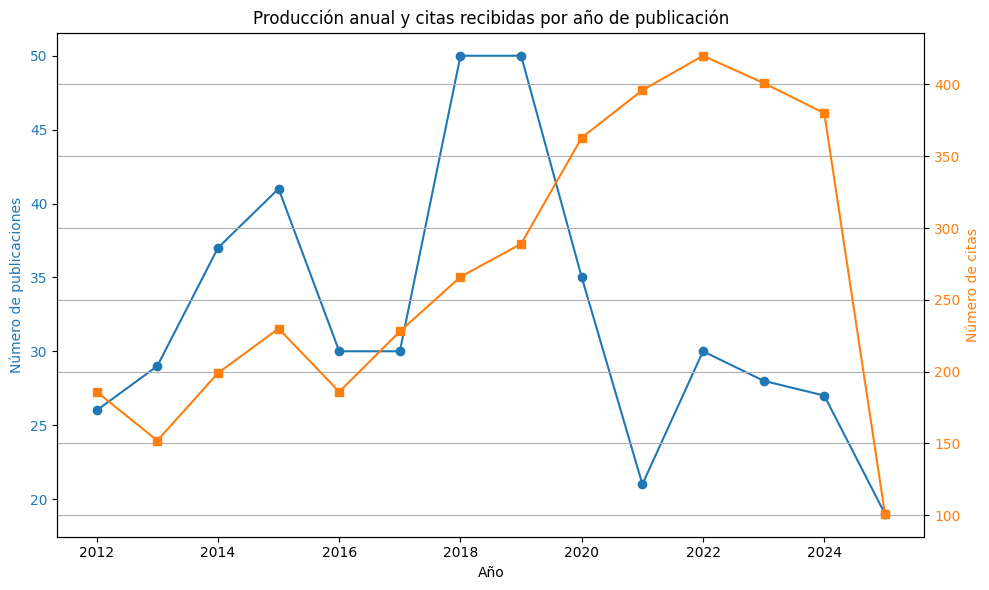

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que ya tienes:
counts_by_year = source.get('counts_by_year', [])
df_years = pd.DataFrame(counts_by_year).sort_values(by='year')

# Crear la figura y los dos ejes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primer eje: número de trabajos
ax1.set_xlabel('Año')
ax1.set_ylabel('Número de publicaciones', color='tab:blue')
ax1.plot(df_years['year'], df_years['works_count'], marker='o', color='tab:blue', label='Publicaciones')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Segundo eje: número de citas
ax2 = ax1.twinx()
ax2.set_ylabel('Número de citas', color='tab:orange')
ax2.plot(df_years['year'], df_years['cited_by_count'], marker='s', color='tab:orange', label='Citas')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Título y layout
plt.title('Producción anual y citas recibidas por año de publicación')
fig.tight_layout()
plt.grid(True)
plt.show()


# Descargar los documentos

In [ ]:
# 1. Importar todas las bibliotecas necesarias
import pandas as pd
import pyalex
from pyalex import Works
import time
import os


# --- CONFIGURACIÓN Y DEFINICIÓN DE RUTAS ---
# Se recomienda crear una carpeta en tu Drive para los datos de tus proyectos
# Por ejemplo, crea una carpeta llamada "Colab_Data" en tu "Mi unidad"
# Define la ruta y el nombre del archivo donde se guardarán/cargarán los datos
DRIVE_PATH = '/content/gdrive/My Drive/Ciencias/Data/OpenAlex/Estudios Demográficos y Urbanos'
FILE_NAME_PARQUET = 'estudios_demograficos_openalex.parquet'
FILE_PATH_PARQUET = os.path.join(DRIVE_PATH, FILE_NAME_PARQUET)

# Asegúrate de que el directorio exista, si no, lo crea
os.makedirs(DRIVE_PATH, exist_ok=True)

# Configurar tu correo para la API de OpenAlex (uso cortés)
pyalex.config.email = "jlja@ciencias.unam.mx"

# --- LÓGICA PRINCIPAL: CARGAR O DESCARGAR ---

# Comprobar si el archivo ya existe en Google Drive
if os.path.exists(FILE_PATH_PARQUET):
    print(f"Archivo encontrado en: {FILE_PATH_PARQUET}")
    print("Cargando datos desde el archivo local...")

    # Si existe, carga el DataFrame directamente desde el archivo Parquet
    df_works = pd.read_parquet(FILE_PATH_PARQUET)

    print("¡Datos cargados exitosamente desde Google Drive!")

else:
    print(f"Archivo no encontrado en {FILE_PATH_PARQUET}.")
    print("Iniciando descarga de datos desde la API de OpenAlex. Esto puede tardar...")

    # --- CÓDIGO DE DESCARGA (si el archivo no existe) ---
    all_works = []
    works_pager = Works().filter(primary_location={"source": {"id": "S2737081250"}}).paginate(per_page=200)

    for page in works_pager:
        all_works.extend(page)
        print(f"Descargada una página. Total de artículos hasta ahora: {len(all_works)}")
        # Pausa de cortesía para no saturar el servidor
        time.sleep(1)

    print("\nDescarga finalizada.")

    # Convertir la lista de resultados a un DataFrame de Pandas
    df_works = pd.DataFrame(all_works)

    # --- PASO CRÍTICO: GUARDAR LOS DATOS DESCARGADOS ---
    if not df_works.empty:
        print(f"Guardando {len(df_works)} artículos en un archivo Parquet para uso futuro...")

        # Guarda el DataFrame en formato Parquet en tu Google Drive
        df_works.to_parquet(FILE_PATH_PARQUET)

        print("¡Archivo guardado exitosamente!")
    else:
        print("No se descargaron datos, no se guardó ningún archivo.")


# --- VISUALIZACIÓN DE LOS DATOS (siempre se ejecuta) ---
if 'df_works' in locals() and not df_works.empty:
    print(f"\nAnálisis basado en un total de {len(df_works)} artículos.")
    print("\nPrimeras 5 filas del DataFrame:")
    print(df_works.head())

    print("\nColumnas disponibles:")
    print(df_works.columns)
else:
    print("\nNo hay datos para mostrar.")

Archivo encontrado en: /content/gdrive/My Drive/Ciencias/Data/OpenAlex/Estudios Demográficos y Urbanos/estudios_demograficos_openalex.parquet
Cargando datos desde el archivo local...
¡Datos cargados exitosamente desde Google Drive!

Análisis basado en un total de 1994 artículos.

Primeras 5 filas del DataFrame:
                                 id                                      doi  \
0  https://openalex.org/W1964199991  https://doi.org/10.24201/edu.v22i1.1293   
1  https://openalex.org/W4406794692   https://doi.org/10.24201/edu.v40.e2230   
2  https://openalex.org/W4406794701   https://doi.org/10.24201/edu.v40.e2234   
3  https://openalex.org/W4406794760   https://doi.org/10.24201/edu.v40.e2242   
4  https://openalex.org/W4406794793   https://doi.org/10.24201/edu.v40.e2228   

                                               title  \
0  En tránsito hacia la adultez: eventos en el cu...   
1  Envejecimiento y corresidencia multigeneracion...   
2  Resiliencia en la Caatinga, Brasil:

In [ ]:
# trabajos de 1986 en adelante
df_works = df_works[df_works['publication_year'] >= 1986]
print(len(df_works))

1326


In [ ]:
df_works['indexed_in'][0]

array(['crossref'], dtype=object)

In [ ]:

dfGrouped = df_works.groupby(['type']).count()
fig = go.Figure([go.Bar(x=dfGrouped['id'], y=dfGrouped.index, orientation='h')])
fig.update_layout( title_text='Tipo de documento')
fig.show()

In [ ]:
dfGrouped = df_works.groupby(['language']).count()
fig = go.Figure([go.Bar(x=dfGrouped['id'], y=dfGrouped.index, orientation='h')])
fig.update_layout( title_text='Idioma')
fig.show()

# Evolución del perfil de desempeño y perfil temático


## Exploración para extraer la información

In [ ]:
for t in df_works.at[0, 'topics']:
  print(t)

{'display_name': 'Gender, Labor, and Family Dynamics', 'domain': {'display_name': 'Social Sciences', 'id': 'https://openalex.org/domains/2'}, 'field': {'display_name': 'Social Sciences', 'id': 'https://openalex.org/fields/33'}, 'id': 'https://openalex.org/T11544', 'score': 0.9822, 'subfield': {'display_name': 'Gender Studies', 'id': 'https://openalex.org/subfields/3318'}}
{'display_name': 'Economic Growth and Productivity', 'domain': {'display_name': 'Social Sciences', 'id': 'https://openalex.org/domains/2'}, 'field': {'display_name': 'Economics, Econometrics and Finance', 'id': 'https://openalex.org/fields/20'}, 'id': 'https://openalex.org/T10393', 'score': 0.9542, 'subfield': {'display_name': 'Economics and Econometrics', 'id': 'https://openalex.org/subfields/2002'}}
{'display_name': 'Insurance, Mortality, Demography, Risk Management', 'domain': {'display_name': 'Social Sciences', 'id': 'https://openalex.org/domains/2'}, 'field': {'display_name': 'Social Sciences', 'id': 'https://ope

In [ ]:
years = df_works['publication_year'].unique()
years=years.sort()
print(years)
#

None


In [ ]:
## La revista inició en el año 1986
years=list(range(1986, 2024 + 1))
print(years)

[1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


In [ ]:
df_works.at[0, 'citation_normalized_percentile']['value']

0.971691

In [ ]:
print('FWCI', df_works['fwci'].mean())
print('Average Percentile', df_works['citation_normalized_percentile'].apply(lambda x: x['value'] if x is not None else False).mean())


FWCI 0.374060528992879
Average Percentile 0.3725673781344031


In [ ]:
count=0
count1=0
count2=0
# Contar usando un for
for row in df_works.iterrows():
  if  row[1]['citation_normalized_percentile'] is not None and row[1]['citation_normalized_percentile']['is_in_top_10_percent']:
    count+=1
  if row[1]['citation_normalized_percentile'] is None:
    count2+=1
  if  row[1]['citation_normalized_percentile'] is not None and row[1]['citation_normalized_percentile']['is_in_top_1_percent']:
    count1+=1
print('Top 10%', count)
print('Top 1%', count1)
print('Registros que no tienen citation_normalized_percentile', count2)

Top 10% 160
Top 1% 4
Registros que no tienen citation_normalized_percentile 33


In [ ]:
# contar usando lambda
print(df_works['citation_normalized_percentile'].apply(lambda x: x['is_in_top_10_percent'] if x is not None else False).sum())

160


## Calculo de los indicadores

In [ ]:
indicators=['No. Documents', 'FWCI', '%Top 10%', 'Average Percentile']
df_performace_profile=pd.DataFrame(index=years, columns=indicators)

for year in years:
  df_year=df_works[df_works['publication_year']==year]
  no_works=len(df_year)
  df_performace_profile.loc[year, 'No. Documents']=no_works
  df_performace_profile.loc[year, 'FWCI']=df_year['fwci'].mean()
  df_performace_profile.at[year, '%Top 10%'] = 100 * (df_year['citation_normalized_percentile'].apply(lambda x: x['is_in_top_10_percent'] if x is not None else False).sum()) / no_works
  df_performace_profile.at[year, 'Average Percentile'] =   (df_year['citation_normalized_percentile'].apply(lambda x: x['value'] if x is not None else False).mean())


In [ ]:
df_performace_profile

,No. Documents,FWCI,%Top 10%,Average Percentile
1986,48,0.136708,2.083333,0.365526
1987,55,0.041836,9.090909,0.306818
1988,38,0.040351,0.0,0.406904
1989,51,0.049882,1.960784,0.234003
1990,54,0.113259,3.703704,0.278989
1991,34,0.188676,5.882353,0.334459
1992,28,0.0,0.0,0.523035
1993,36,0.073778,0.0,0.42069
1994,39,0.065282,7.692308,0.401242
1995,29,0.134069,6.896552,0.426344


In [ ]:
df_performace_profile.to_csv('performace_profile.csv', sep=';')
#